<a href="https://colab.research.google.com/github/SVJLucas/ApprAuto2023/blob/main/3_DelayPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's Import the Libraries to be used:


## 1. Let's download the libraries we'll be using

In [ ]:
pip install --use-deprecated=legacy-resolver pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 8.1 M

## 2. Let's import the libraries

In [ ]:
import numpy as np
import  pandas as pd
import  seaborn as sns
import  scipy.stats as stats
import  matplotlib.pyplot as plt

from pycaret.regression import *

Let's allow the library to be viewed for model testing:

# To recap...

In the last notebook, we changed the structure and form of the explanatory variables to make machine learning easier, going through the whole **feature engineering** and **feature selection** pipeline.

In this notebook, we will test various machine learning models and check their performance on various metrics, choosing the one that performs best.

But first, let's re-access the data we had processed:

To do this, let's log in and access google drive:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
target_features = ['year',
       'commentaires_retard_arrivee', 'commentaires_retard_arrivee_lag1',
       'commentaire_annulation', 'commentaire_annulation_lag1',
       'commentaire_retards_depart', 'commentaire_retards_depart_lag1',
       'nb_train_retard_sup_15', 'nb_train_retard_sup_30',
       'nb_train_retard_sup_60', 'prct_cause_externe', 'prct_cause_infra',
       'prct_cause_gestion_trafic', 'prct_cause_materiel_roulant',
       'prct_cause_gestion_gare', 'prct_cause_prise_en_charge_voyageurs']

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/ML-3A/Data/processed_train.csv')
X_train = X_train.drop(columns=target_features)

X_valid = pd.read_csv('/content/drive/MyDrive/ML-3A/Data/processed_validation.csv')
X_valid = X_valid.drop(columns=target_features)

X_train = X_train.append(X_valid)
X_train = X_train.reset_index(drop=True)

X_test = pd.read_csv('/content/drive/MyDrive/ML-3A/Data/processed_test.csv')
X_test = X_test.drop(columns=target_features)

In [ ]:
X_train

,month,service,gare_depart,gare_arrivee,nb_train_prevu,service_lag1,duree_moyenne_lag1,nb_train_prevu_lag1,nb_annulation_lag1,nb_train_depart_retard_lag1,...,prct_cause_gestion_gare_lag1,prct_cause_prise_en_charge_voyageurs_lag1,nb_train_retard_arrivee,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,retard_moyen_tous_trains_arrivee,retard_moyen_arrivee,duree_moyenne
0,-0.341711,0.0,-1.061536,0.000000,-0.238370,0.0,-0.825088,-0.245016,0.775621,-0.538768,...,0.000000,0.000000,31,32,5,11.206667,0.431352,3.827622,15.140860,75
1,0.629949,0.0,-1.061536,0.000000,0.267163,0.0,-1.149623,0.407703,0.210617,0.410011,...,0.106383,0.000000,46,15,113,5.575369,2.219608,3.655163,15.884420,51
2,-0.711403,0.0,0.000000,0.000000,0.290823,0.0,0.147964,0.334358,-0.192944,-0.432465,...,0.045455,0.045455,6,12,15,7.725556,0.010646,1.959886,54.936111,183
3,-0.522254,0.0,0.788591,5.535635,0.099500,0.0,0.374925,0.160740,-0.585331,-0.207495,...,0.068966,0.000000,30,2,36,8.906019,1.149715,5.732621,38.221111,209
4,0.163227,0.0,0.788591,0.000000,0.130005,0.0,0.513348,0.140632,0.000000,0.572654,...,0.000000,0.000000,12,5,165,1.255051,0.873699,2.443038,21.944444,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7293,-0.168025,0.0,-0.510777,2.021583,-0.268750,0.0,-0.423315,-0.076644,0.000000,-0.030503,...,0.062500,0.187500,33,0,58,12.997989,4.548225,9.368540,41.671212,114
7294,-0.168025,0.0,0.000000,-2.796681,0.519804,0.0,-0.259608,0.535451,0.671606,-0.359408,...,0.222222,0.222222,25,0,35,14.114762,0.994274,2.222290,25.074667,130
7295,0.163227,0.0,0.000000,-0.838397,-0.408592,0.0,0.140358,-0.429266,-0.585331,-0.670082,...,0.090909,0.272727,17,0,12,22.529167,1.756194,5.719595,37.764706,182
7296,0.000000,0.0,0.000000,0.466610,0.661697,0.0,0.109742,0.893404,0.934683,0.057326,...,0.032258,0.016129,127,3,111,22.818468,6.852568,15.185854,39.197769,176


# Choosing the Best Model

To check a wide range of models, we're going to use Pycaret, an AutoML library.

With the data processed, we can start testing possible model candidates.


In [ ]:
exp_clf101 = setup(data = X_train,
                   target = 'retard_moyen_tous_trains_arrivee',
                   normalize = True,
                   transformation = True,
                   session_id=123,
                   feature_selection=True,
                   index=False,
                   remove_multicollinearity = True,
                   multicollinearity_threshold = 0.95,
                   n_features_to_select=0.4)

,Description,Value
0,Session id,123
1,Target,retard_moyen_tous_trains_arrivee
2,Target type,Regression
3,Original data shape,"(7298, 33)"
4,Transformed data shape,"(7298, 13)"
5,Transformed train set shape,"(5108, 13)"
6,Transformed test set shape,"(2190, 13)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


## Comparing Models

To compare the models, we will first use the **R2** metric. A **Kfold will be used for cross validation with k=10**. Let's now test several different models and see which one works best on the desired dataset:

In [ ]:
best_models = compare_models(sort = 'r2',n_select = 4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,1.2583,62.3582,5.1756,0.5597,0.2689,0.3600,1.2780
huber,Huber Regressor,1.4548,60.9491,5.1814,0.5583,0.3121,0.5752,0.8170
gbr,Gradient Boosting Regressor,1.4502,63.5114,5.2399,0.5531,0.2945,0.5935,2.3030
lightgbm,Light Gradient Boosting Machine,1.3825,62.5915,5.2492,0.5494,0.3293,0.4979,2.5640
rf,Random Forest Regressor,1.4407,63.1043,5.2978,0.5373,0.2908,0.5163,5.0760
et,Extra Trees Regressor,1.2474,63.0847,5.2006,0.5353,0.2703,0.5081,2.4100
catboost,CatBoost Regressor,1.1232,62.6409,5.1713,0.5349,0.2664,0.3609,6.1840
knn,K Neighbors Regressor,1.7623,66.5564,5.7126,0.4224,0.3481,0.7290,0.6770
br,Bayesian Ridge,1.8726,64.0287,5.7699,0.3431,0.4290,0.7940,0.6010
ridge,Ridge Regression,1.8811,64.0360,5.7726,0.3423,0.4321,0.8060,0.9220


Processing:   0%|          | 0/88 [00:00<?, ?it/s]

Thus, 20 different models were tested on the dataset, and the three that performed best in the R2 metric (as well as in other metrics) were selected to ensamble.

In [ ]:
best_models[0].feature_names_in_

array(['gare_arrivee', 'nb_train_prevu', 'duree_moyenne_lag1',
       'retard_moyen_tous_trains_depart_lag1',
       'nb_train_retard_arrivee_lag1',
       'retard_moyen_tous_trains_arrivee_lag1', 'prct_cause_infra_lag1',
       'nb_train_retard_arrivee', 'nb_annulation',
       'retard_moyen_tous_trains_depart', 'retard_moyen_arrivee',
       'duree_moyenne'], dtype='<U37')

In [ ]:
blend_model = blend_models(best_models,fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0760,4.4321,2.1053,0.7619,0.2735,1.0001
1,0.9166,2.4330,1.5598,0.8388,0.2385,0.2860
2,1.3257,19.8552,4.4559,0.4629,0.2698,0.3075
3,1.6690,120.0946,10.9588,0.1392,0.2987,0.3075
4,1.0890,4.8195,2.1953,0.7222,0.2730,0.4018
5,1.0084,2.4327,1.5597,0.8621,0.2748,0.2782
6,1.9318,443.6175,21.0622,0.0400,0.3330,0.2839
7,0.9462,2.4909,1.5783,0.8571,0.2327,0.4388
8,1.0543,2.8702,1.6942,0.8291,0.2591,0.3649


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
final_blend_model = finalize_model(blend_model)

# Evaluating

In [ ]:
holdout_pred = predict_model(final_blend_model,data=X_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.9016,2.0892,1.4454,0.8414,0.1851,0.2184


In [ ]:
y_pred = holdout_pred['prediction_label']
y_true = holdout_pred['retard_moyen_tous_trains_arrivee']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from typing import List

def plot_results(y_true: List[float], y_pred: List[float]) -> None:
    """
    Plot both the standardized residuals plot and the predicted vs true values plot side by side,
    with a common title that includes the R2 score.

    Args:
        y_true: List of true values.
        y_pred: List of predicted values.

    Returns:
        None

    Raises:
        ValueError: If y_true and y_pred have different lengths.
    """

    # Check if lengths are the same
    if len(y_true) != len(y_pred):
        raise ValueError("Lengths of y_true and y_pred must be the same.")

    # Calculate the residuals
    residuals = np.array(y_true) - np.array(y_pred)

    # Standardize the residuals
    std_residuals = residuals / np.std(residuals)

    # Calculate the R2 score
    r2 = r2_score(y_true, y_pred)

    # Create the subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Common title with R2 score
    fig.suptitle(fr"Evaluation of TGV Model to Average train delay time - $R^2$ = {r2:.2f}", fontsize=18)

    # Plot for standardized residuals
    axes[0].scatter(y_pred, std_residuals, c='blue')
    axes[0].axhline(y=0, color='r', linestyle='--')
    axes[0].set_xlabel("Predicted Values", fontsize=14)
    axes[0].set_ylabel("Standardized Residuals", fontsize=14)
    axes[0].set_title("Standardized Residuals Plot", fontsize=16)

    # Plot for y_true vs y_pred
    axes[1].scatter(y_pred, y_true, c='blue', label='Data')
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', label='x=y')
    axes[1].set_xlabel("Predicted Values", fontsize=14)
    axes[1].set_ylabel("True Values", fontsize=14)
    axes[1].set_title("Predicted vs True Values", fontsize=16)
    axes[1].legend(fontsize=12)

    # Show the plots
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


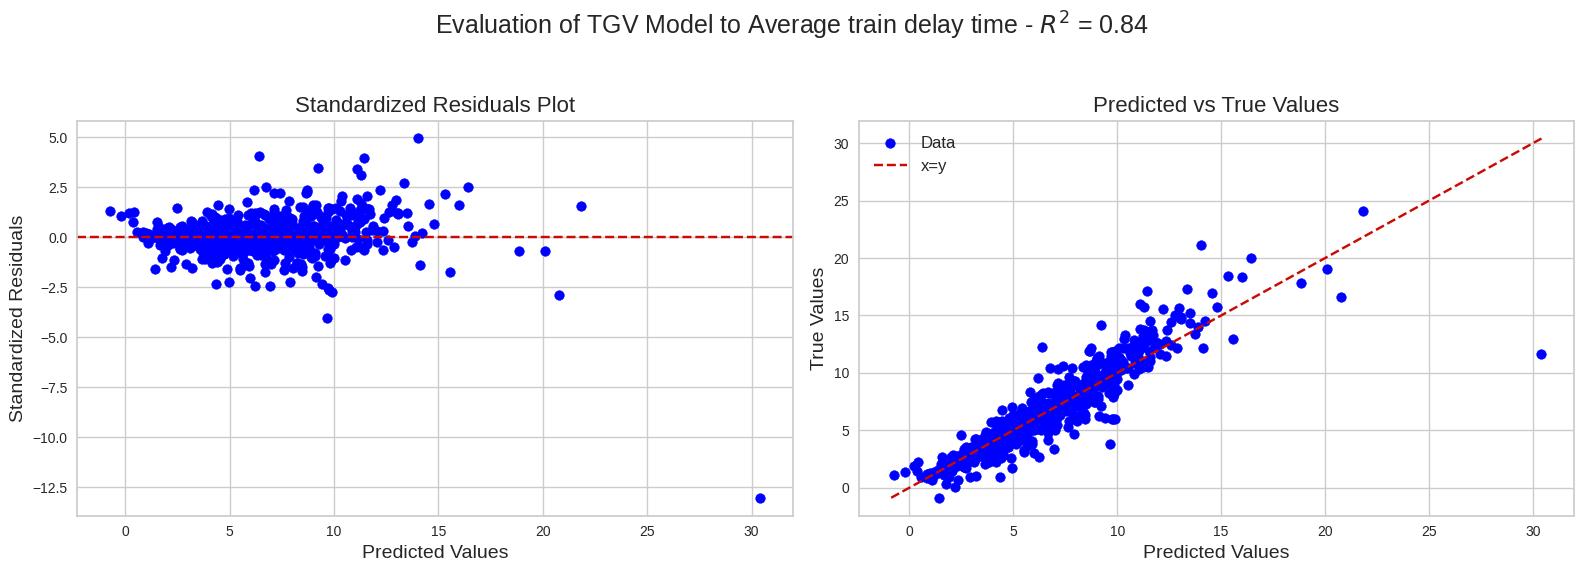

In [ ]:
plot_results(y_true,y_pred)